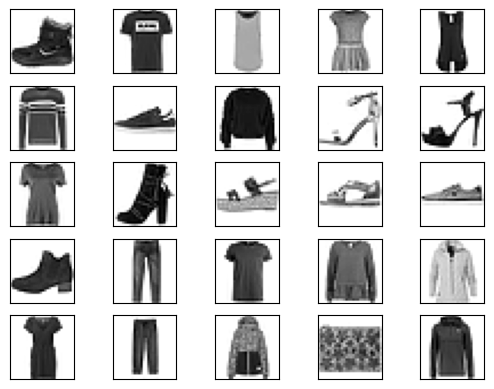

In [2]:
#fashion mnist 데이터셋

#DNN만 이용해서 학습하고 결과를 내보자

#필요한 것들을 불러온다
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam

# mnist fashion data set이 다운 받아짐
# 만약 이전에 다운로드 되었다면 tensolflow 폴더 안에 data set이 존재
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 분류
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 25개를 시각적으로 분류
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()



In [3]:
# mnist 받아온 그림은 grayscale. grayscale이 가지는 값은 0~255. 255로 나누면 픽셀값이 0~1로 바뀜
x_train, x_test = x_train / 255.0, x_test / 255.0
# x_train, x_test 값을 255로 나눔


In [4]:
#모델 생성
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(10, activation='softmax')])

    
    # Flatten: 차원을 1차원으로 바꿔줌
    # CNN에 합성곱층이나 최대풀링층을 지나면 완전연결층에 전달할 때는 1차원 데이터로 변환
    # 28x28 이미지를 1차원 데이터로 바꿔줌   
   # tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  # 밀집층의 입력으로 사용하고 입력층과 출력층을 연결하기위해 밀집층(데이터와 특징이 모두 연결된 상태)을 사용, 128은 뉴런의 숫자, 활성함수는 렐루
   # tf.keras.layers.Dense(128, activation='relu'),
  
  # 0.2 -> 20% 랜덤하게 특정 노드를 0으로 만듦
   # tf.keras.layers.Dropout(0.2),
  
  # 출력층의 노드 개수는 10개이고 활성화 함수는 소프트 맥스
  #이미지 입력 -> 각 품목일 확률, 품목일 개수가 10개, 그래서 10이라는 숫자와 스프트 맥스 함수
   # tf.keras.layers.Dense(10, activation='softmax')
   # ])



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#옵티마이저: 아담
# 손실함수


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7611 - loss: 0.6838 - val_accuracy: 0.8265 - val_loss: 0.4555
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8540 - loss: 0.4013 - val_accuracy: 0.8564 - val_loss: 0.3937
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8636 - loss: 0.3671 - val_accuracy: 0.8658 - val_loss: 0.3628
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3410 - val_accuracy: 0.8634 - val_loss: 0.3686
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8776 - loss: 0.3278 - val_accuracy: 0.8739 - val_loss: 0.3480
313/313 - 0s - 635us/step - accuracy: 0.8739 - loss: 0.3480


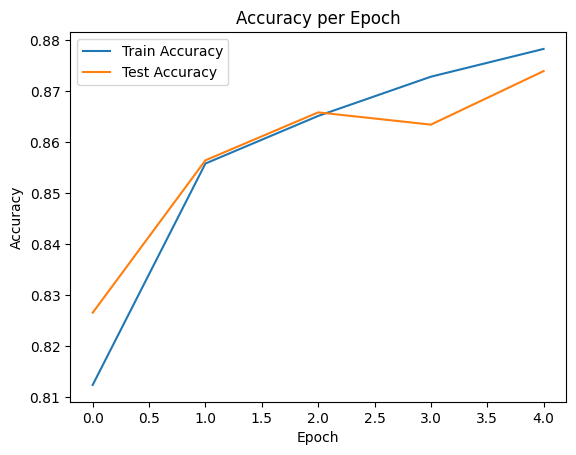

313/313 - 0s - 614us/step - accuracy: 0.8739 - loss: 0.3480


[0.34797289967536926, 0.8738999962806702]

In [6]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test, verbose=2)

# 정확도 플롯 그리기
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8813 - loss: 0.3181 - val_accuracy: 0.8735 - val_loss: 0.3475
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8837 - loss: 0.3105 - val_accuracy: 0.8751 - val_loss: 0.3508
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8903 - loss: 0.2928 - val_accuracy: 0.8791 - val_loss: 0.3343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8944 - loss: 0.2816 - val_accuracy: 0.8797 - val_loss: 0.3387
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8960 - loss: 0.2814 - val_accuracy: 0.8819 - val_loss: 0.3271


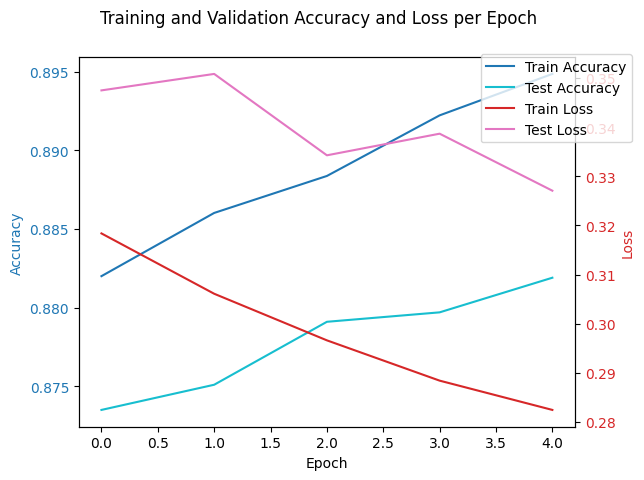

313/313 - 0s - 593us/step - accuracy: 0.8819 - loss: 0.3271


[0.3270796239376068, 0.8819000124931335]

In [7]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
# 정확도 및 손실 플롯 그리기
fig, ax1 = plt.subplots()

# 정확도 플롯
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='tab:blue')
ax1.plot(history.history['val_accuracy'], label='Test Accuracy', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 손실 플롯
ax2 = ax1.twinx()  # 두 번째 y축을 공유
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(history.history['loss'], label='Train Loss', color='tab:red')
ax2.plot(history.history['val_loss'], label='Test Loss', color='tab:pink')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 플롯 제목 및 레전드 설정
fig.suptitle('Training and Validation Accuracy and Loss per Epoch')
fig.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
plt.show()

model.evaluate(x_test, y_test, verbose=2)

In [8]:
# 합성곱 신경망 생성

# x_traing.reshape((-1,28,28,1))/255.
# reshape 다른 형태, -1 : 배열의 첫번째 차원의 크기를 자동으로 계산
# 28, 28 : 이미지를 28x28 크기로 변환
# 1 : 채널 수 나타내고, 흑백 이미지 1
# /255 0~1 사이의 값으로 값 변경
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.
print(x_train.shape)
print(X_train_final.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [9]:

# 모델 생성
model_with_conv = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    # 28 28 1 형태의 입력값
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    # 2차원 컨볼루션, 활성화 함수는 렐루, 32 필터 개수, (3,3) 합성곱 커널(필터)의 행과 열, padding: 경계 처리 방법, same 출력 이미지 크기 =이미지 크기
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    #maxpooling, 필터크기2x2, strides 2: 풀링윈도가 이동할때 간격
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    #maxpooling 결과를 1차원 행렬로 바꿈. flatten
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])




In [10]:
model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [11]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.4696 - loss: 1.3654
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7590 - loss: 0.6288
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7911 - loss: 0.5579
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8074 - loss: 0.5173
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8208 - loss: 0.4833
313/313 - 1s - 2ms/step - accuracy: 0.8113 - loss: 0.5018


[0.5017655491828918, 0.8112999796867371]